Task 1

Import all the modules and libraries necessary

In [1]:
from zipfile import ZipFile
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import pandas as pd 
import seaborn as sns
import numpy as np

Import data

In [2]:
zip_dir_path = "vislearnlab_compfocus.zip" # downloaded folder from dropbox

csv_dir_path = "q1_visualizing_data/vocabulary_dataset.csv" # target csv file path


# I need to open the downloaded zip file in order to access 
# target csv file. Rather than manually moving the csv file into 
# vll_interview_tasks, I chose to preserve this zip file challenge to 
# demonstrate my file handling abiity [which I got a lot of practice with 
# from using Pavlovia]

with ZipFile(zip_dir_path, 'r') as zip_file:
    with zip_file.open(csv_dir_path) as f:
        df = pd.read_csv(f)

print(df.shape) # check that all rows/columns are preserved by cross-referencing csv itself

(1102, 4)


Now to clean the data, making sure the data types are what we expect and the column names have no spaces

In [3]:
df['targetWord'] = df['targetWord'].astype(str)

df['age_group'] = pd.to_numeric(df['age_group'], errors='coerce')

df['pc'] = pd.to_numeric(df['pc'], errors='coerce')

df['num_subjects'] = pd.to_numeric(df['num_subjects'], errors='coerce')

df.columns = df.columns.str.strip() 

print(df.dtypes) # targetWord will display a dtype of object but that's just how pandas handles strings


targetWord       object
age_group         int64
pc              float64
num_subjects      int64
dtype: object


How many unique age groups are there? How many unique words are there? 

In [4]:
unique_ages = df['age_group'].unique()

unique_words = df['targetWord'].unique()

print(f"Unique ages: {unique_ages.size}")
print(f"Unique words: {unique_words.size}")


Unique ages: 10
Unique words: 112


The questions do I want to answer by creating the following visualizations:

How does performance change with age? 
How can I visualize the general spread of data, without it being overwhelming?


How does performance change over time?

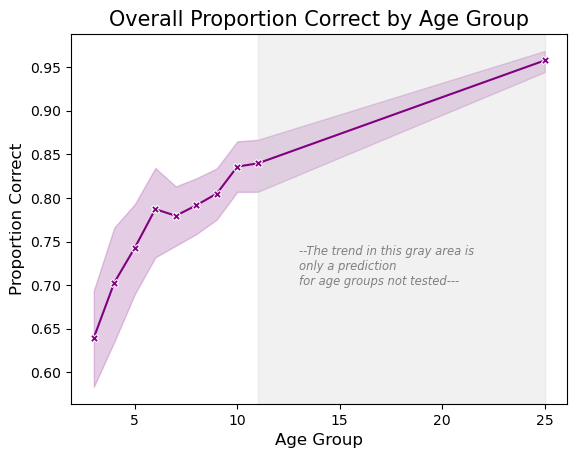

In [5]:
line_plot = sns.lineplot(data=df, x='age_group', y='pc', marker='X', color = 'purple')
# include marker to emphasize the 14-year age gap

plt.axvspan(11, 25, color='lightgray', alpha=0.3, label='Data Gap') 
    # i want to emphasize that the graph from 11-25 is predicted, so I'm graying it out
    # citation: https://matplotlib.org/3.8.3/api/_as_gen/matplotlib.axes.Axes.axvspan.html

plt.text(13, 0.7, "--The trend in this gray area is \nonly a prediction \nfor age groups not tested---", style = 'italic', color = '0.5', size = 'small')
    # citation: https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def
    
plt.title('Overall Proportion Correct by Age Group', fontsize=15)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Proportion Correct', fontsize=12)

plt.savefig('q1_graphs\line_plot.png')

Here's another way to depict performance over time

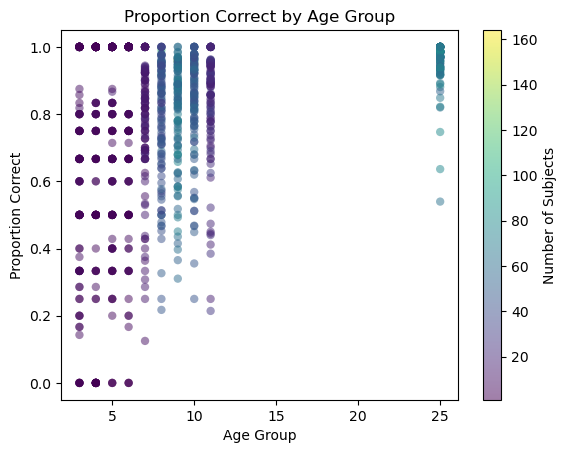

In [6]:
plt.scatter(x=df['age_group'], y=df['pc'], label=None,
            c=df['num_subjects'], cmap='viridis',
             linewidth=0, alpha=0.5)

plt.xlabel('Age Group')
plt.ylabel('Proportion Correct')
plt.title('Proportion Correct by Age Group')

plt.colorbar(label='Number of Subjects')
    # citation: https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html


Question 2: How can I represent all of the data in a way that's doesn't distill the information or overload the viewer?

Since I have a nominal variable (targetWord), 2 interval variables (age, num_subjects), and a continuous variable (pc), how would I visualize them? I need 4 dimensions...The third dimension (other than the axes) will be color, but how to represent the 4th? Size could work...

What about a weighted/bubble scatter plot? 

Text(0.5, 1.0, 'Proportion Correct by Age Group')

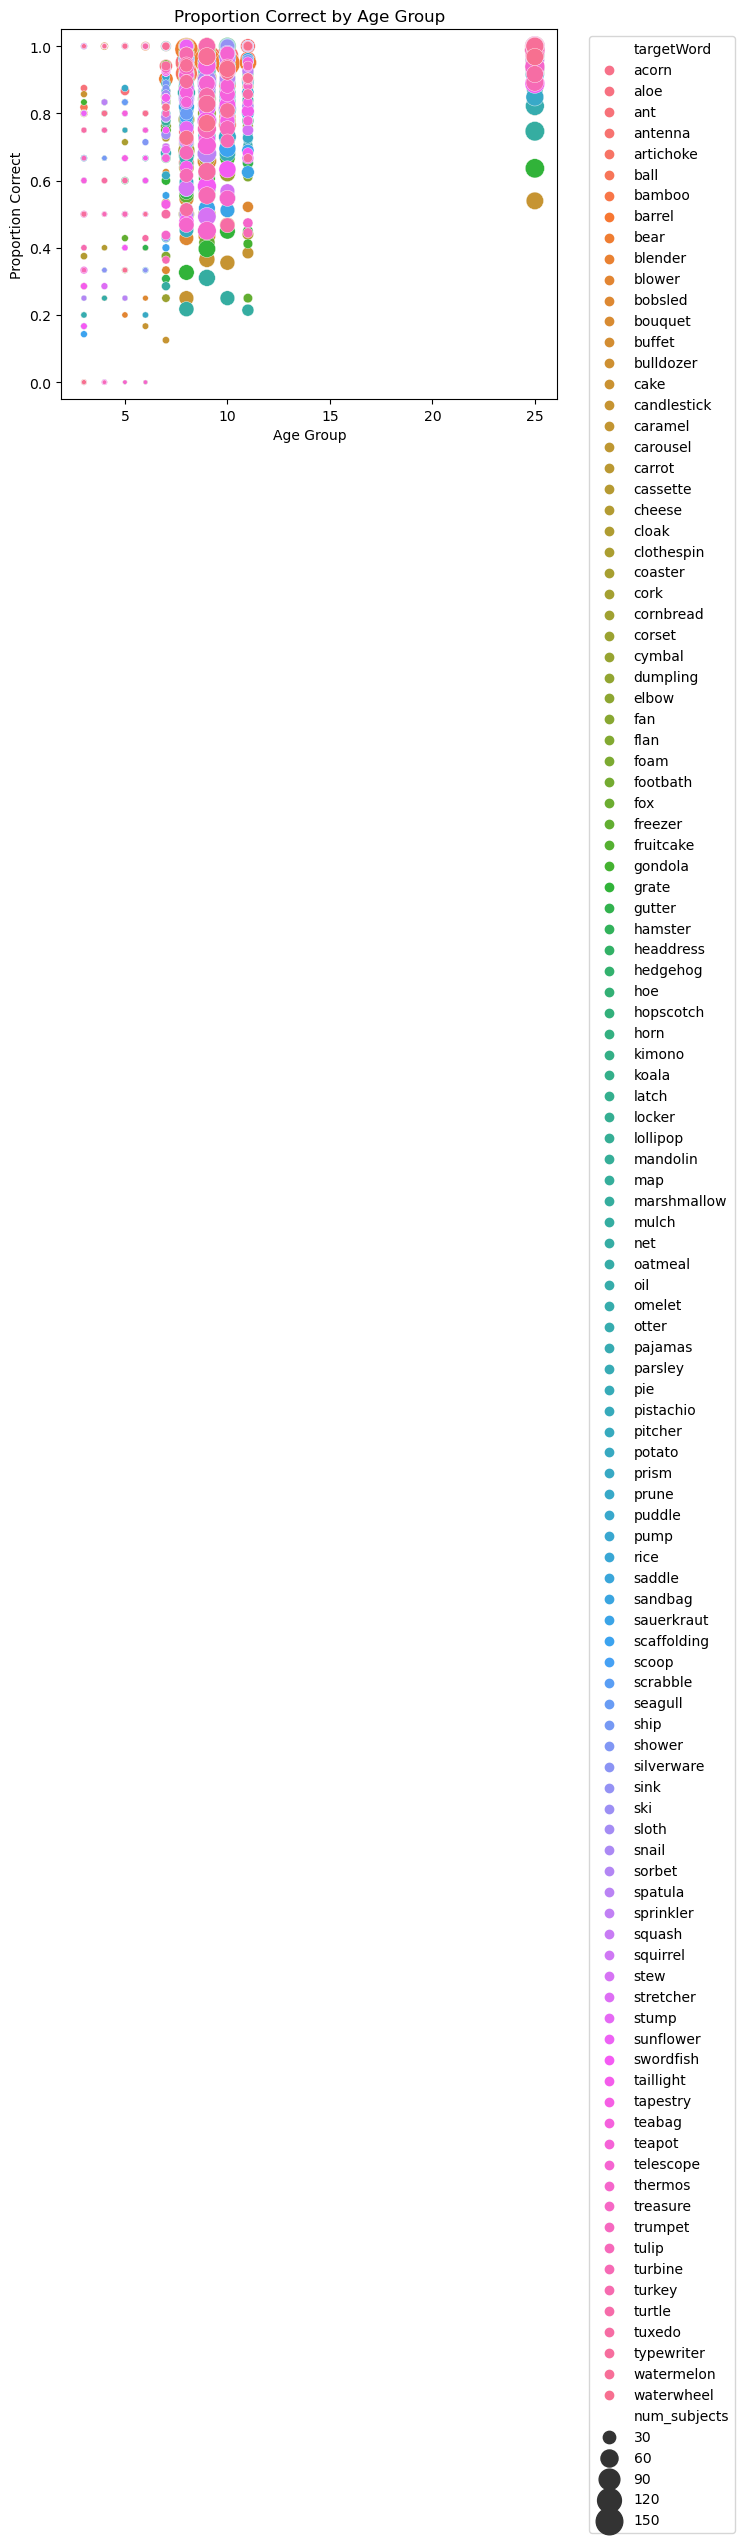

In [7]:
by_pc_scatter_plot = sns.scatterplot(data = df, x='age_group', y='pc', hue='targetWord', size = 'num_subjects', sizes = (10,400))
    # citation: https://seaborn.pydata.org/generated/seaborn.scatterplot.html

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # citation: https://stackoverflow.com/questions/65888394/how-to-prevent-scatter-legend-from-overlapping
plt.xlabel('Age Group')
plt.ylabel('Proportion Correct')
plt.title('Proportion Correct by Age Group')


Okay so that isn't super informative. You can glean that the older age groups tend to have higher num_subjects and higher pc, but I don't like how overlaid the bubbles are. Plus, the legend is distracting and unintuitive! Giving each word their own color is extremely unintuitive when trying to determine what color goes with which word, and using a gradient like this implies some level of continous variable which is misleading. I need to use color to represent something else.
  

What if I give each word a place on the y-axis, with pc on the x-axis, size for num_subjects, and color for age group, since there are only 10?

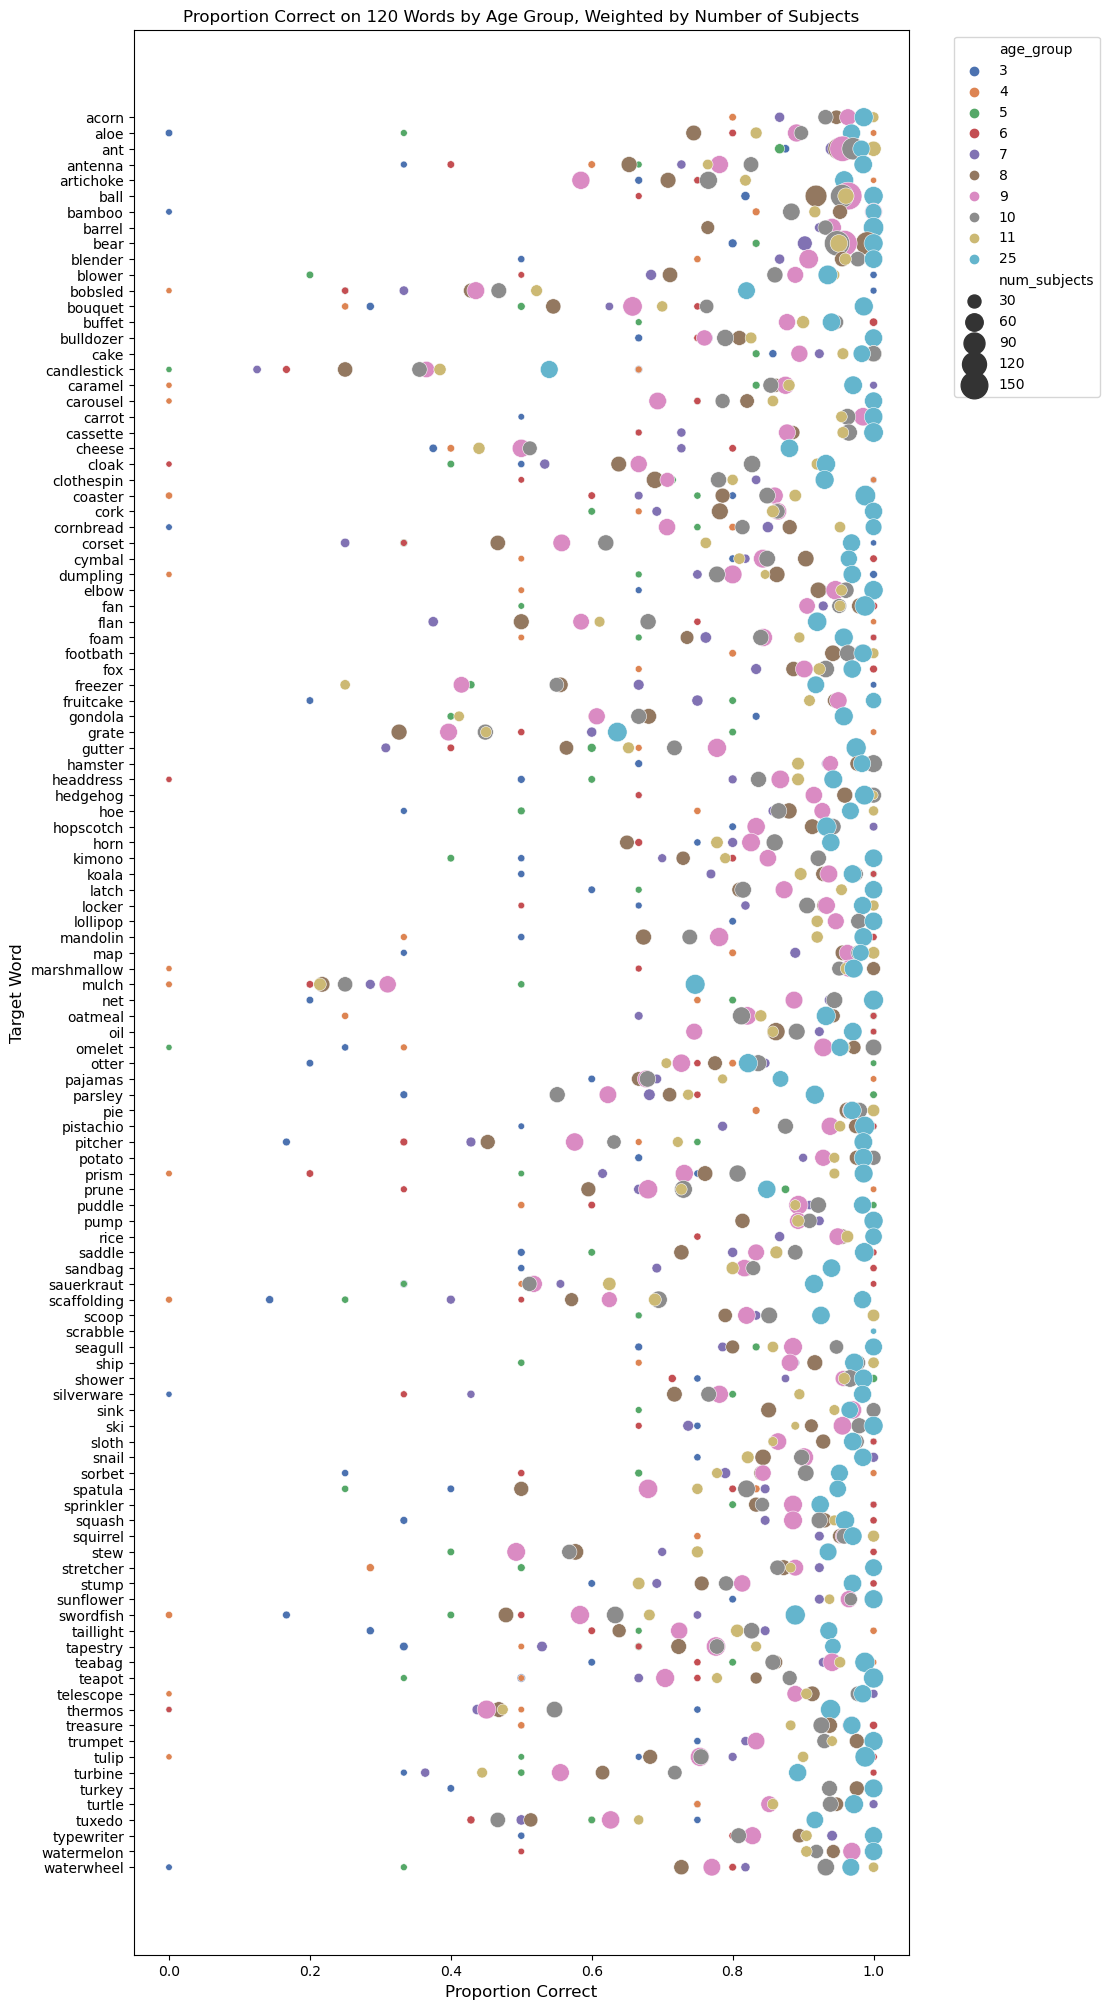

In [8]:
plt.figure(figsize=(10, 25))

word_scatter_plot = sns.scatterplot(data = df, x='pc', y='targetWord', hue='age_group', size = 'num_subjects', sizes = (20,400), palette="deep")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    # citation: https://stackoverflow.com/questions/65888394/how-to-prevent-scatter-legend-from-overlapping
plt.xlabel('Proportion Correct', fontsize=12)
plt.ylabel('Target Word', fontsize=12)
plt.title('Proportion Correct on 120 Words by Age Group, Weighted by Number of Subjects')
plt.savefig('q1_graphs\word_scatter_plot.png', bbox_inches='tight')


Okay, now we're getting somewhere. But there's too much information here. For the purposes of this exercise I'll drop the num_subjects, because it's the least relevant to the correlational questions I'm interested in with regards to age and pc. 


So then, each word needs it's own place and I can order them alphabetically as they already are. Of age and pc, it's more intuitive to use a color gradient for pc, since there are more data points and color variation preserves the significance of percent differences. Age would make the most sense on the x-axis because it's related to time.  


First I'll need to make a new df where the index is the targetWord, because I need to reorganize my data to relate the three variables of interest.

In [9]:
new_df = df.pivot(index="targetWord", columns="age_group", values="pc")

print(new_df.head())

age_group         3    4         5     6         7         8         9   \
targetWord                                                                
acorn       1.000000  0.8  1.000000  1.00  0.866667  0.947368  0.963636   
aloe        0.000000  1.0  0.333333  0.80  0.900000  0.744681  0.890625   
ant         0.875000  1.0  0.866667  1.00  0.941176  0.950980  0.955882   
antenna     0.333333  0.6  0.666667  0.40  0.727273  0.653061  0.781250   
artichoke   0.666667  1.0  0.750000  0.75  0.764706  0.708333  0.584615   

age_group         10        11        25  
targetWord                                
acorn       0.931818  1.000000  0.986111  
aloe        0.897436  0.833333  0.968750  
ant         0.970874  1.000000  0.982759  
antenna     0.826087  0.764706  0.985294  
artichoke   0.765625  0.818182  0.958333  


Now I can make my visualization. I'll use a heatmap.

Text(64.47222222222221, 0.5, 'Target Word')

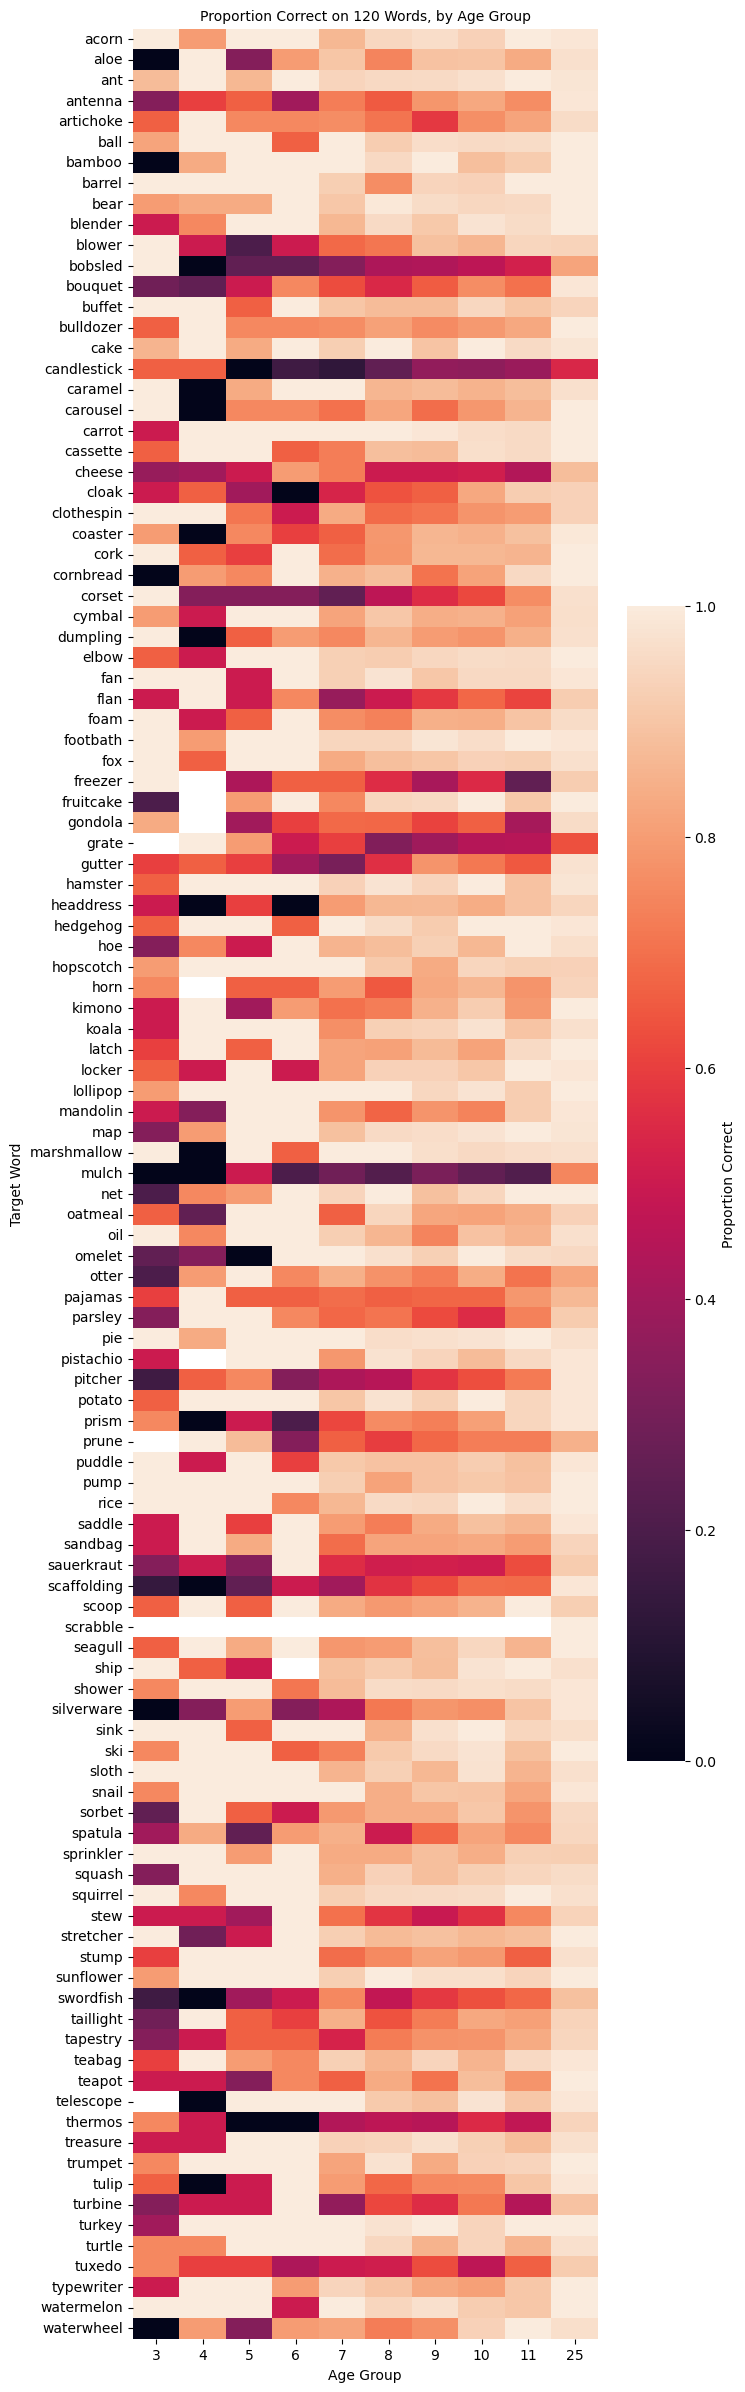

In [10]:
plt.figure(figsize=(7.5, 30)) #needs to be longer because 20 was suppressing every other label
sns.heatmap(new_df, cbar_kws={"shrink": 0.5, "label": 'Proportion Correct'})
    # citation: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.title("Proportion Correct on 120 Words, by Age Group", fontsize=10)
plt.xlabel("Age Group")
plt.ylabel("Target Word")


Okay that looks good! Can I add the numeric value for pc overlaid on top, to anchor an understanding of the color value?

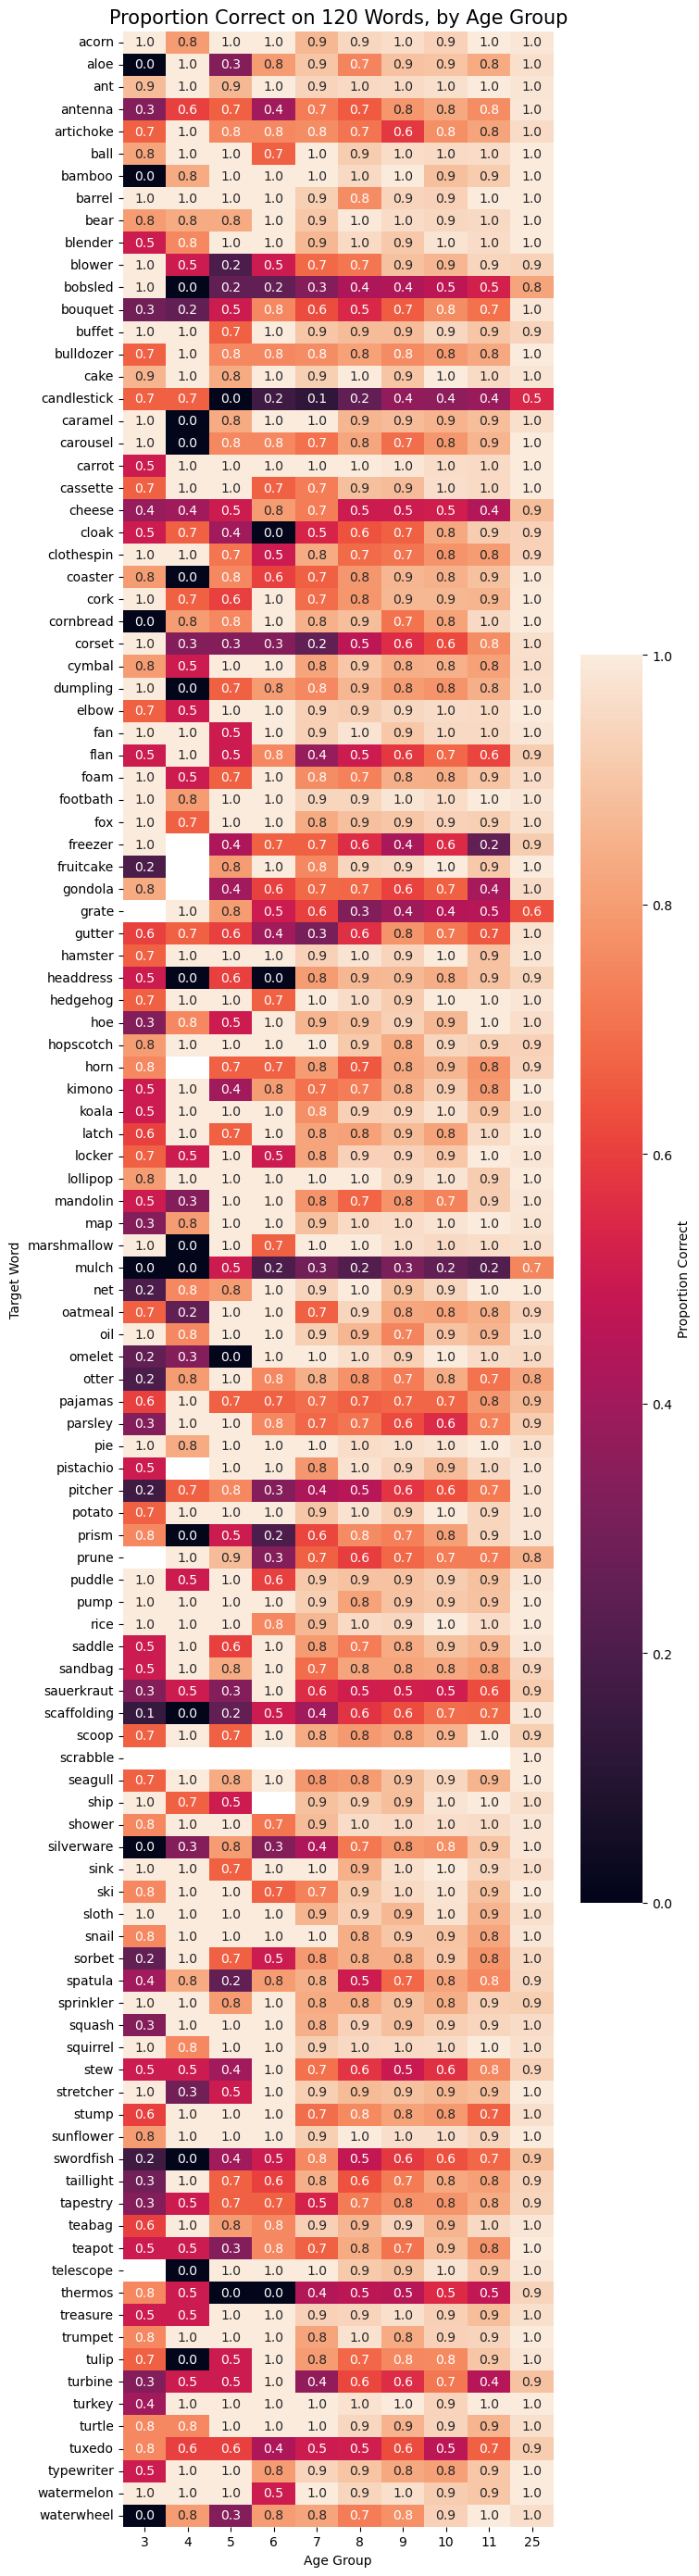

In [11]:

plt.figure(figsize=(7.5, 35)) # the numbers looked super scrunched, so I stretched the heatmap out
heatmap_plot = sns.heatmap(new_df, annot=True, fmt=".1f", cbar_kws={"shrink": 0.5, "label": 'Proportion Correct'})
    # citation: https://seaborn.pydata.org/generated/seaborn.heatmap.html
plt.title("Proportion Correct on 120 Words, by Age Group", fontsize=15)
plt.xlabel("Age Group")
plt.ylabel("Target Word")

plt.savefig('q1_graphs\heatmap_plot.png')


To visualize pc by age_group, I'll use a line graph with different colors for a subset of different words. I'm going to select words with high variance (words that go from dark to light, as seen above). 

Let compute the top 5 words with the most variance and then graph those.

In [12]:
variance_df = df.groupby('targetWord')['pc'].var()
greatest_variance = variance_df.nlargest(5)
    # citation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.nlargest.html

print(greatest_variance)

targetWord
omelet       0.148682
headdress    0.129188
telescope    0.104112
aloe         0.102023
prism        0.099733
Name: pc, dtype: float64


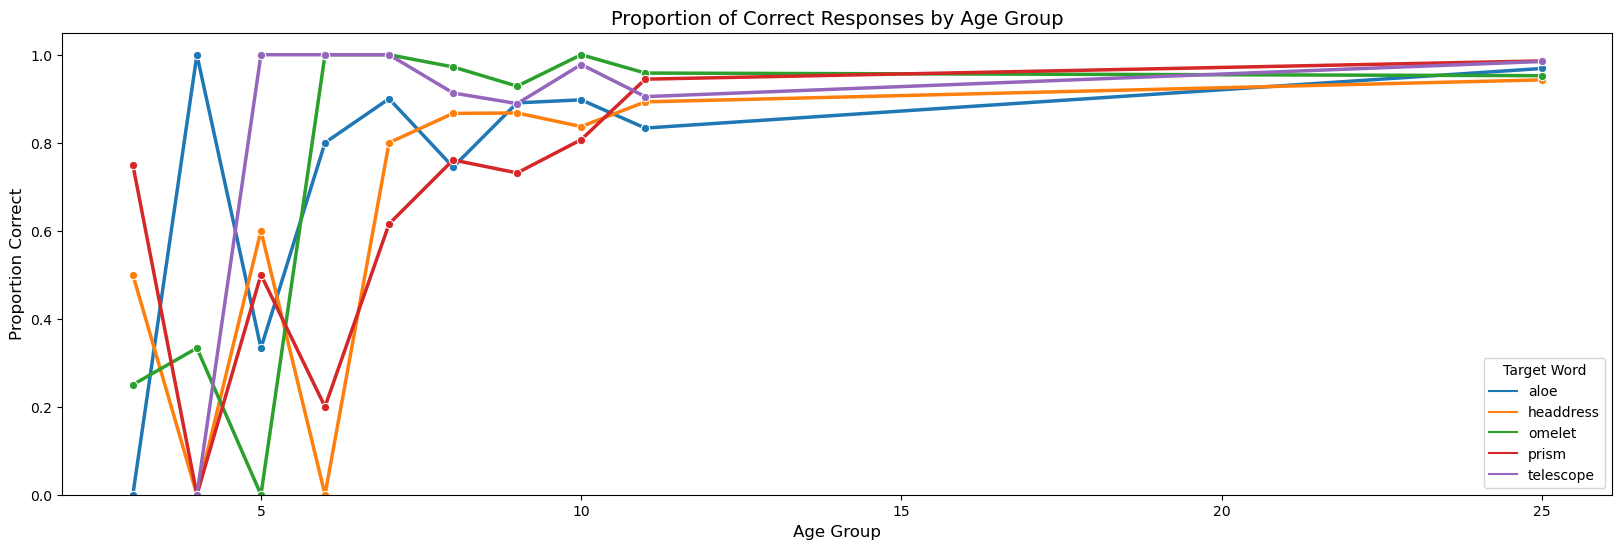

In [13]:
top_var_words = ['omelet',
                'headdress',
                'telescope',
                'aloe',
                'prism' 
]

var_words_df = df[df['targetWord'].isin(top_var_words)]

plt.figure(figsize=(20, 6))
var_words_plot = sns.lineplot(data=var_words_df, x='age_group', y='pc', hue='targetWord', 
             marker='o', linewidth=2.5)
    #citation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
plt.title("Proportion of Correct Responses by Age Group", fontsize=14)
plt.ylabel("Proportion Correct", fontsize=12)
plt.xlabel("Age Group", fontsize=12)
plt.ylim(0, 1.05) 
plt.legend(title="Target Word", loc = 'lower right')
plt.show()


Okay that looks good! But it could be better if I can reduce the amount of deadspace. I'll need to point out the change in axis

In [14]:
# Note: I used Gemini to figure out how to reduce the amount of deadspace
    # citation: https://gemini.google.com/app?is_sa=1&is_sa=1&android-min-version=301356232&ios-min-version=322.0&campaign_id=bkws&utm_source=sem&utm_medium=paid-media&utm_campaign=bkws&pt=9008&mt=8&ct=p-growth-sem-bkws&gclsrc=aw.ds&gad_source=1&gad_campaignid=20108148196&gbraid=0AAAAApk5BhknCsYAFZG-aZTretwik6Hx2&gclid=Cj0KCQiA18DMBhDeARIsABtYwT0ppYpNfA2sQWuW7H4UlaV4xschqHFpAgzx3e64Z_jbXOfTmUkOd9EaArYDEALw_wcB

# 1. Convert to string to kill the deadspace
subset_df = var_words_df.copy()
subset_df['age_group'] = subset_df['age_group'].astype(str)

# 2. Sort values to ensure 11 comes before 25 (important for strings!)
subset_df = subset_df.sort_values('age_group', key=lambda x: x.astype(int))


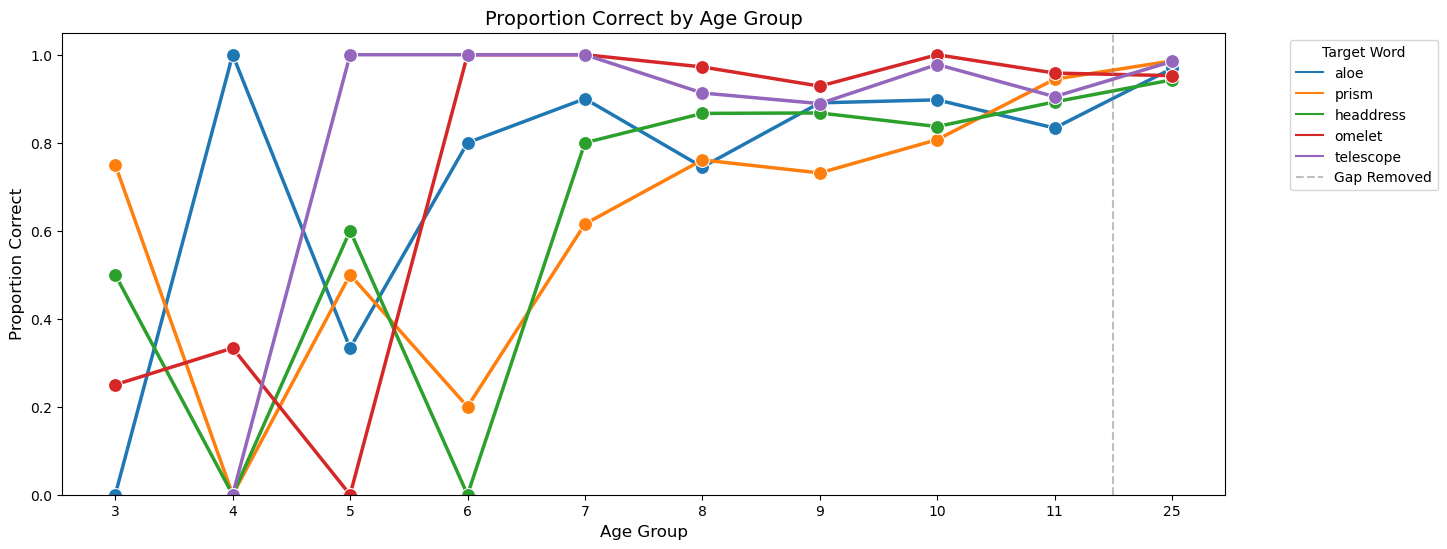

In [15]:
plt.figure(figsize=(15, 6))


v_line_var_words_plot = sns.lineplot(data=subset_df, x='age_group', y='pc', hue='targetWord', 
                  marker='o', markersize=10, linewidth=2.5)


plt.axvline(x=8.5, color='gray', linestyle='--', alpha=0.5, label='Gap Removed')
    # citation: https://stackoverflow.com/questions/52334938/how-to-add-vertical-lines-to-a-distribution-plot
    # citation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axvline.html

plt.title("Proportion Correct by Age Group", fontsize=14)
plt.ylabel("Proportion Correct", fontsize=12)
plt.xlabel("Age Group", fontsize=12)
plt.ylim(0, 1.05) 
plt.legend(title="Target Word", loc='best', bbox_to_anchor=(1.05, 1))
plt.show()


I don't like the vertical line, it's not clear enough. Let's do what I used in the first graph instead:


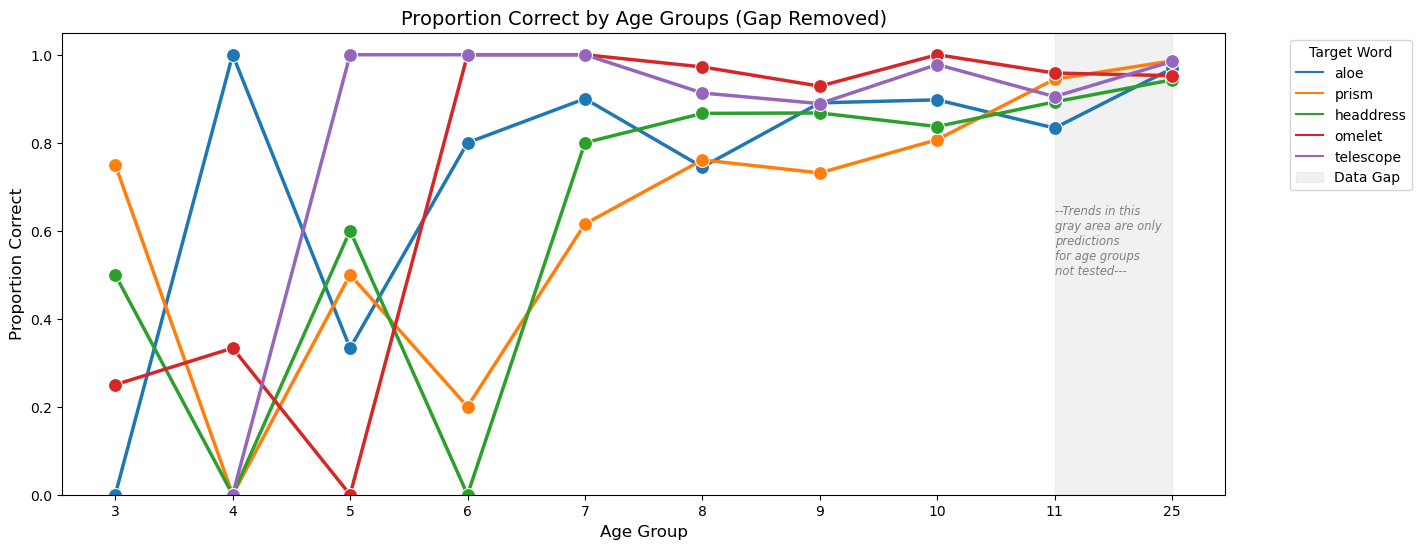

In [16]:
plt.figure(figsize=(15, 6))


g_area_var_words_plot = sns.lineplot(data=subset_df, x='age_group', y='pc', hue='targetWord', 
                  marker='o', markersize=10, linewidth=2.5)


plt.axvspan(8, 9, color='lightgray', alpha=0.3, label='Data Gap') 
    # i want to emphasize that the graph from 11-25 is predicted, so I'm graying it out
    # citation: https://matplotlib.org/3.8.3/api/_as_gen/matplotlib.axes.Axes.axvspan.html

plt.text(8, 0.5, "--Trends in this \ngray area are only \npredictions \nfor age groups \nnot tested---", style = 'italic', color = '0.5', size = 'small')
    # citation: https://matplotlib.org/stable/users/explain/colors/colors.html#colors-def
    
plt.title("Proportion Correct by Age Groups (Gap Removed)", fontsize=14)
plt.ylabel("Proportion Correct", fontsize=12)
plt.xlabel("Age Group", fontsize=12)
plt.ylim(0, 1.05) 
plt.legend(title="Target Word", loc='best', bbox_to_anchor=(1.05, 1))

plt.savefig('q1_graphs\g_area_var_words_plot.png',  bbox_inches='tight')
